In [1]:
import json
import pandas as pd
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt

In [2]:
with open('../results/transcripts_full_score.json') as file:
    transcripts_dict = json.load(file)

In [3]:
def logit(scores):
    '''
    scores::list
    Computes logit score for the list of input scores
    '''
    scores = [x for x in scores if isinstance(x, int) or isinstance(x, float)]
    hawk = sum([i for i in scores if i>0 ])
    dove = abs(sum([i for i in scores if i< 0 ]))
    
    logit_scaled = np.log((hawk+0.5)/(dove+0.5))

    return(logit_scaled)

In [4]:
year = []
mean_score = []
sd_score = []
logit_score = []
for key, value in transcripts_dict.items():
    scores = [x for x in list(chain.from_iterable(value.values())) if isinstance(x, int) or isinstance(x, float)]
    
    year.append(key)
    mean_score.append(np.mean(scores))
    sd_score.append(np.std(scores))
    logit_score.append(logit(scores))

In [5]:
results = pd.DataFrame(list(zip(year, mean_score, sd_score, logit_score)), 
                           columns = ['year', 'mean_score', 'sd_score', 'logit_score'])

In [6]:
results

,year,mean_score,sd_score,logit_score
0,19940204,0.265625,0.279071,2.890372
1,19940322,0.269231,0.397849,1.504077
2,19940517,0.423077,0.266469,3.135494
3,19940706,0.285714,0.364216,1.845827
4,19940816,0.326923,0.365385,1.897120
...,...,...,...,...
180,20160615,-0.115385,0.374877,-0.693147
181,20160727,-0.044118,0.350790,-0.318454
182,20160921,0.000000,0.439941,0.000000
183,20161102,0.045455,0.334021,0.356675


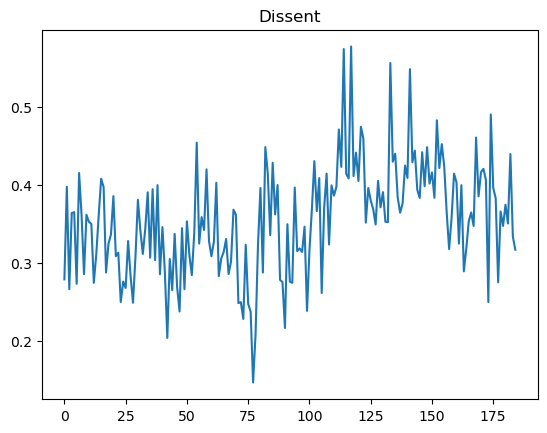

In [7]:
plot = results['sd_score'].plot(kind='line', title="Dissent")

In [173]:
# results[['year','mean_score']].to_csv('../results/transcript_mean.csv', index=False)
# results[['year','sd_score']].to_csv('../results/transcript_sd.csv', index=False)
# results[['year','logit_score']].to_csv('../results/transcript_logit.csv', index=False)